In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("results.csv")

In [15]:
# df_3x3 = df[df["Name"].str.startswith("grid_{'rows': 3")]
df_3x3 = df[df["Name"].str.startswith("tree_{'levels': 3")]

In [16]:
rf_dim = df_3x3["random_feature_dim"].to_list()
sa_conf = df_3x3["sa_conf"].to_list()
sa_dist_ratio = df_3x3["sa_dist_ratio"].to_list()
test_conf = df_3x3["test_conf"].to_list()
state_dim = df_3x3["state_dim"].to_list()
alpha = df_3x3["alpha"].to_list()

In [17]:
def get_val(rf_dim, alpha, state_dim, metric):
    vals = df_3x3[(df_3x3["random_feature_dim"] == rf_dim) & (df_3x3["alpha"] == alpha) & (df_3x3["state_dim"] == state_dim)][metric].tolist()
    return np.mean(vals), np.std(vals)

In [18]:
rf_dims = [250, 500, 1000, 2000]
alphas = [1, 2, 4, 8]
state_dims = [25, 50, 100, 200]

d1 = np.zeros((4, 4, 4))
s1 = np.zeros((4, 4, 4))
for i in range(4):
    for j in range(4):
        for k in range(4):
            d1[i, j, k], s1[i, j, k] = get_val(rf_dims[i], alphas[j], state_dims[k], "test_conf")

d2 = np.zeros((4, 4, 4))
s2 = np.zeros((4, 4, 4))
for i in range(4):
    for j in range(4):
        for k in range(4):
            d2[i, j, k], s2[i, j, k] = get_val(rf_dims[i], alphas[j], state_dims[k], "sa_conf")

d3 = np.zeros((4, 4, 4))
s3 = np.zeros((4, 4, 4))
for i in range(4):
    for j in range(4):
        for k in range(4):
            d3[i, j, k], s3[i, j, k] = get_val(rf_dims[i], alphas[j], state_dims[k], "sa_dist_ratio")

/Users/calvin/miniforge3/envs/pytorch/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/calvin/miniforge3/envs/pytorch/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/calvin/miniforge3/envs/pytorch/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/calvin/miniforge3/envs/pytorch/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/calvin/miniforge3/envs/pytorch/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'Random feature dimension')

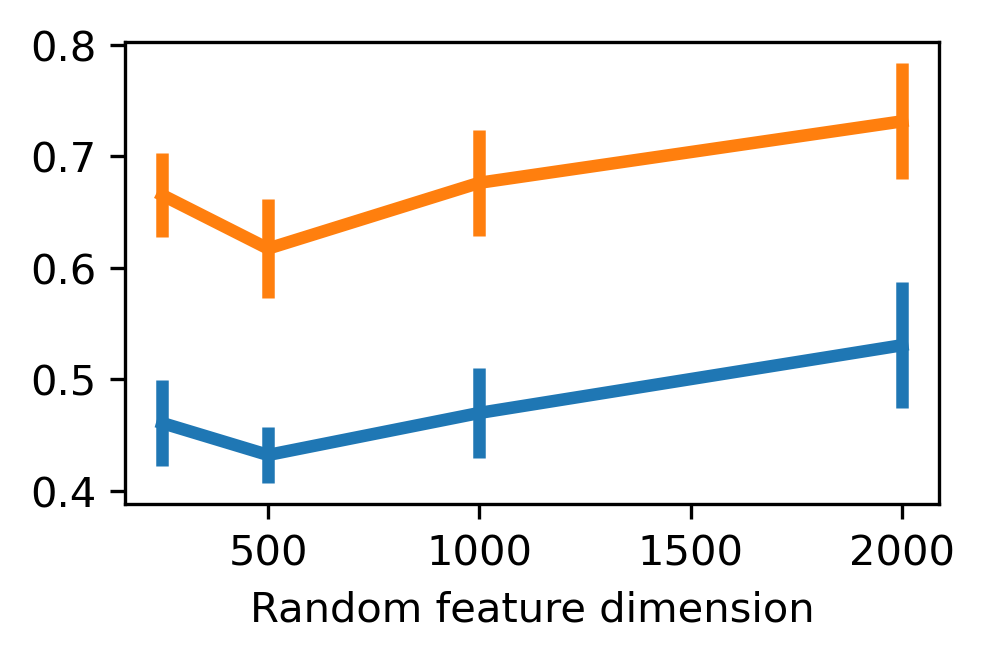

In [19]:
# plt.figure(figsize=(3.5, 2), dpi=300)
# plt.plot(rf_dims, d1[:, 2, 1], label="Test confidence", linewidth=3)
# plt.plot(rf_dims, d2[:, 2, 1], label="State-action confidence", linewidth=3)
# plt.xlabel("Random feature dimension")
# #plt.legend()

plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(rf_dims, d1[:, 2, 1], s1[:, 2, 1], label="Test confidence", linewidth=3)
plt.errorbar(rf_dims, d2[:, 2, 1], s2[:, 2, 1], label="State-action confidence", linewidth=3)
plt.xlabel("Random feature dimension")
#plt.legend()

Text(0.5, 0, '$\\alpha$')

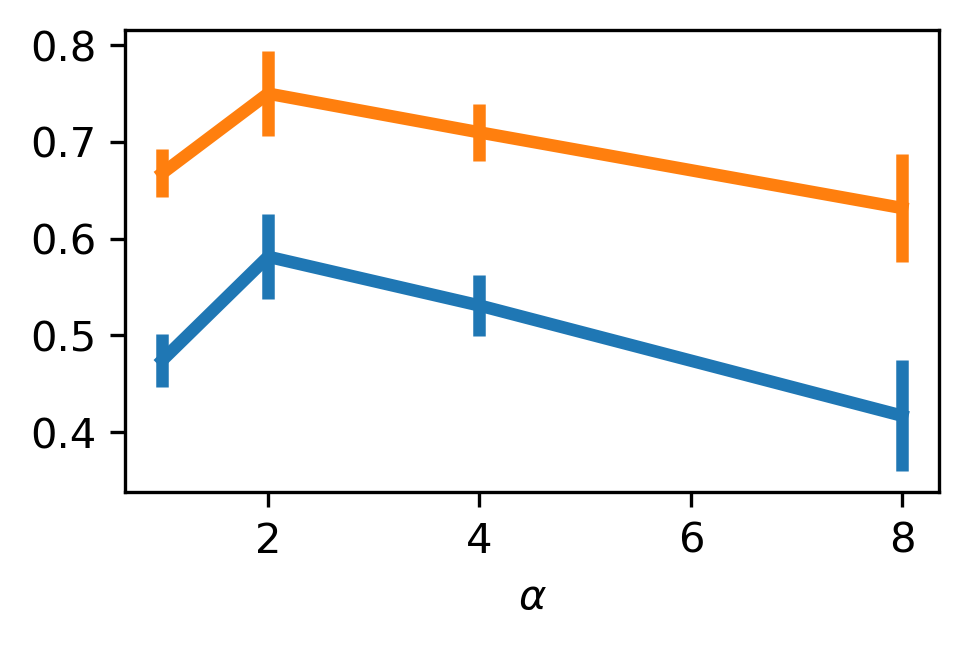

In [20]:
plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(alphas, d1[3, :, 0], s1[3, :, 0], label="Test confidence", linewidth=3)
plt.errorbar(alphas, d2[3, :, 0], s2[3, :, 0], label="State-action confidence", linewidth=3)
plt.xlabel("$\\alpha$")
#plt.legend()

Text(0.5, 0, 'State dimension')

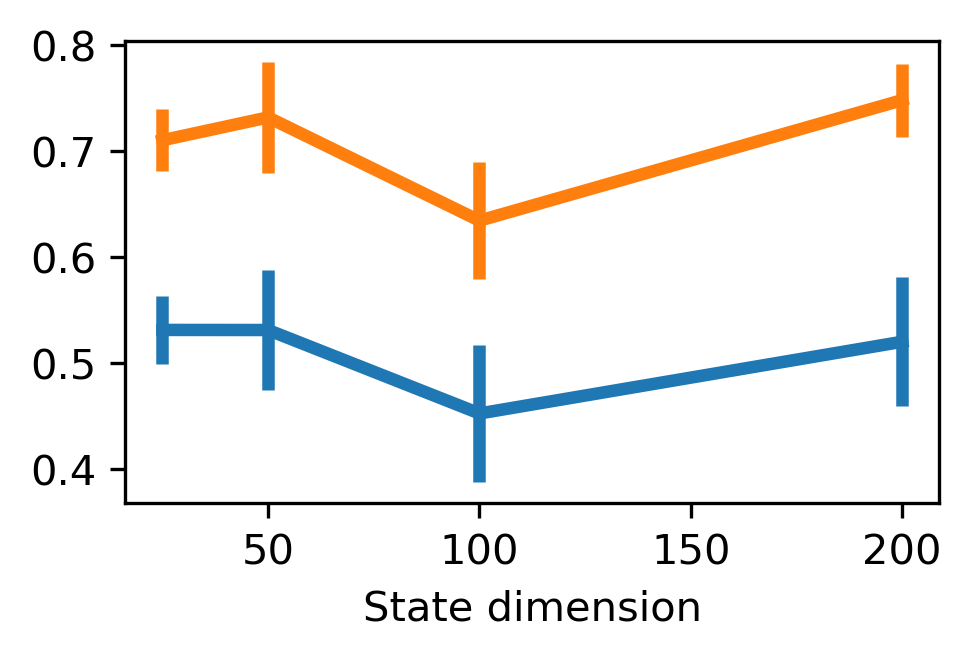

In [21]:
plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(state_dims, d1[3, 2, :], s1[3, 2, :], label="Test confidence", linewidth=3)
plt.errorbar(state_dims, d2[3, 2, :], s2[3, 2, :], label="State-action confidence", linewidth=3)
plt.xlabel("State dimension")
#plt.legend()

Text(0.5, 0, 'Random feature dimension')

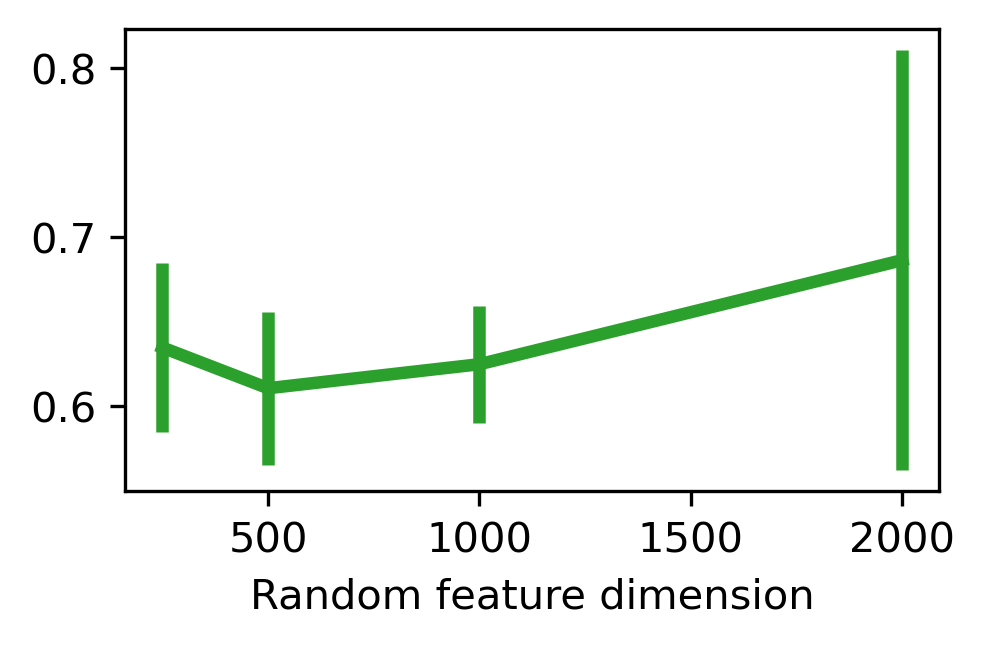

In [22]:
plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(rf_dims, d3[:, 2, 1], s3[:, 2, 1], label="State-action dist. ratio", c="tab:green", linewidth=3)
plt.xlabel("Random feature dimension")
#plt.legend()

Text(0.5, 0, '$\\alpha$')

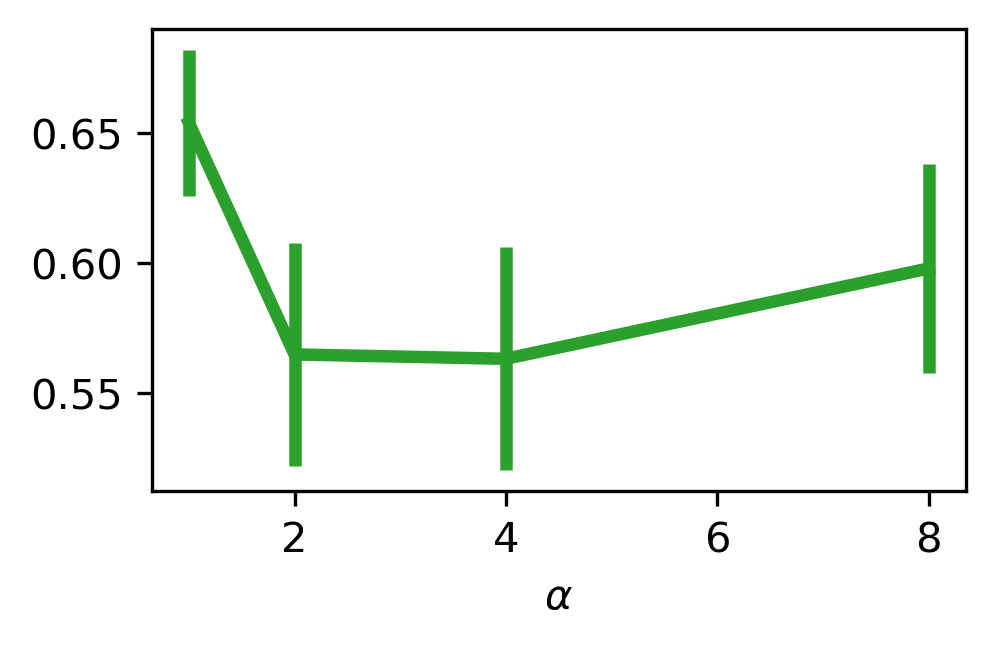

In [23]:
plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(alphas, d3[3, :, 0], s3[3, :, 0], label="State-action dist. ratio", c="tab:green", linewidth=3)
plt.xlabel("$\\alpha$")
#plt.legend()

Text(0.5, 0, 'State dimension')

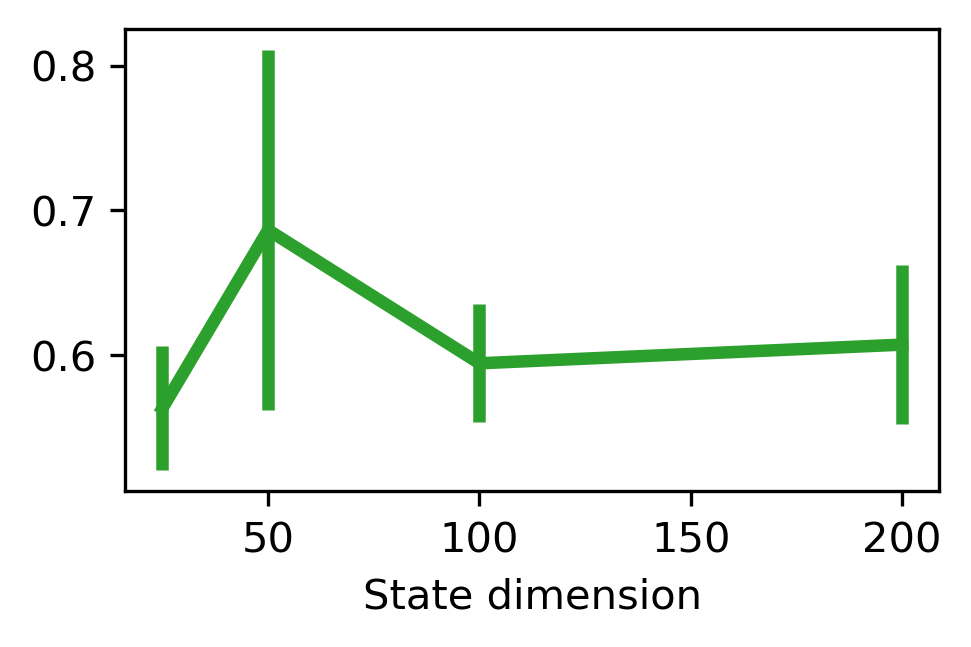

In [24]:
plt.figure(figsize=(3.5, 2), dpi=300)
plt.errorbar(state_dims, d3[3, 2, :], s3[3, 2, :], label="State-action dist. ratio", c="tab:green", linewidth=3)
plt.xlabel("State dimension")
#plt.legend()